 ### Exploración y preparación de los datos

In [2]:
#%pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

^C
Note: you may need to restart the kernel to use updated packages.


In [4]:
# PARA FORMATEAR LOS FLOATS Y NO SE IMPRIMAN CON NOTACION CIENTÍFICA.
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [1]:
# librerías base
import pandas as pd
from IPython.display import HTML
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.display import HTML
from IPython.display import display

# cargamos el dataset
data = pd.read_excel('BaseDatosProyecto.xlsx')

numericalColumns = data._get_numeric_data().columns.tolist() 
categoricalColumns = list(set(data.columns) - set(data.describe().columns))

data.set_index('Empresa', inplace=True)

data.head()

print(data.shape)


(1381, 7)


### Perfilamiento de los datos

In [2]:
data.head()

,Annual Turnover,Employee Count,Activos Fijos,Aon Office,Industry,TIER GENERAL,Produccion
Empresa,,,,,,,
132,579245735319,3038,716954431572,Bogota,"Food System, Agribusiness and Beverage",TIER 1,-7.258044e+06
1061,67176109000,975,38508144000,Bogota,Business and Personal Services,TIER 3,-4.130888e+06
622,154255168000,1587,87866173000,Bogota,Transportation and Logistics,TIER 3,-1.822678e+06
173,1271848954000,157,462891146000,Bogota,Energy,TIER 1,-1.288362e+06
144,433259253705,558,129907322353,Cali,Pharmaceutical and Chemicals,TIER 2,-1.242214e+06


In [9]:
data.nunique()

Annual Turnover    1381
Employee Count      731
Activos Fijos      1338
Aon Office            6
Industry             19
TIER GENERAL          4
Produccion         1366
dtype: int64

## ***Vamos a implementar Clustering con Datos categóricos utilizando la Distancia Gower***

In [10]:
import gower

distance_matrix = gower.gower_matrix(data)
distance_matrix

array([[0.        , 0.29604757, 0.29398784, ..., 0.49979362, 0.21230178,
        0.3137978 ],
       [0.29604757, 0.        , 0.14585318, ..., 0.6517156 , 0.36332887,
        0.46571976],
       [0.29398784, 0.14585318, 0.        , ..., 0.64871955, 0.36033285,
        0.46272373],
       ...,
       [0.49979362, 0.6517156 , 0.64871955, ..., 0.        , 0.29009607,
        0.528515  ],
       [0.21230178, 0.36332887, 0.36033285, ..., 0.29009607, 0.        ,
        0.26479328],
       [0.3137978 , 0.46571976, 0.46272373, ..., 0.528515  , 0.26479328,
        0.        ]], dtype=float32)

#### ***Implementamos clustering aglomerativo usando  sklearn con distintos enlaces:***

In [11]:
from sklearn.cluster import AgglomerativeClustering
model_single = AgglomerativeClustering(n_clusters=2, linkage='single', affinity='precomputed')
clusters_single = model_single.fit_predict(distance_matrix)

<AxesSubplot:ylabel='None'>

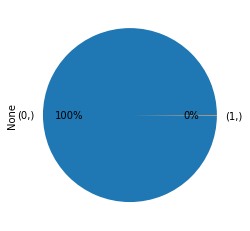

In [12]:
predic = pd.DataFrame()
predic['single-predictions'] = clusters_single
predic[['single-predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

#### ***Al utilizar un enlace SIMPLE y usando la distancia Gower no se puede identificar los clusters.***

<AxesSubplot:ylabel='None'>

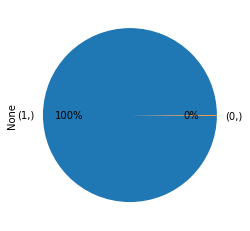

In [14]:
model_average = AgglomerativeClustering(n_clusters=2, linkage='average', affinity='precomputed')
clusters_average = model_average.fit_predict(distance_matrix)
predic['average-predictions'] = clusters_average
predic[['average-predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

#### ***Al utilizar un enlace AVERAGE y usando la distancia Gower no se identifican clusters.***

<AxesSubplot:ylabel='None'>

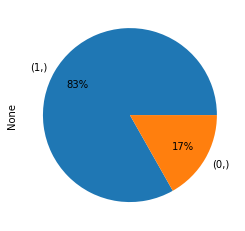

In [21]:
model_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', affinity='precomputed')
clusters_complete = model_complete.fit_predict(distance_matrix)
predic['complete-predictions'] = clusters_complete
predic[['complete-predictions']].value_counts().plot.pie(autopct='%1.0f%%', pctdistance=0.7, labeldistance=1.1)

#### ***Al utilizar un enlace COMPLETO y usando la distancia Gower podemos detectar 2 clusters.***

In [45]:
data['cluster'] = predic[['complete-predictions']]
data[data['cluster']==0].nunique()

Annual Turnover    206
Employee Count     172
Activos Fijos      198
Aon Office           6
Industry            19
TIER GENERAL         4
Produccion         205
cluster              1
dtype: int64

In [40]:
data[data['cluster']==1].nunique()

Annual Turnover    1078
Employee Count      645
Activos Fijos      1062
Aon Office            6
Industry             19
TIER GENERAL          4
Produccion         1068
cluster               1
dtype: int64

#### ***Como se observa anteriormente se encuentran la misma cardinalidad para las variables categoricas sea en el cluster 0 o 1.***

In [42]:
data[data['cluster']==0].describe()

,Annual Turnover,Employee Count,Activos Fijos,Produccion,cluster
count,206.00000,206.00000,206.00000,206.00000,206.00000
mean,560746051290.66504,1004.33981,620157308403.21362,6337086.52524,0.00000
std,1734827974920.00391,2356.83658,3358666705552.40088,22692157.08910,0.00000
min,2040373000.00000,1.00000,0.00000,-1822678.46122,0.00000
25%,7012698250.00000,40.25000,1676530500.00000,163562.40383,0.00000
50%,61004321500.00000,210.50000,20600422120.00000,805591.83673,0.00000
75%,396062733570.00000,1001.25000,176975278000.00000,4264715.14847,0.00000
max,17542728791780.00000,23000.00000,42573722322923.00000,217903786.17753,0.00000


In [44]:
data[data['cluster']==1].describe()

,Annual Turnover,Employee Count,Activos Fijos,Produccion,cluster
count,1078.00000,1078.00000,1078.00000,1078.00000,1078.00000
mean,427045125101.03894,884.30334,413576939801.05011,5318551.93986,1.00000
std,2583459537784.34814,2167.36837,3566426713292.19971,25334531.42696,0.00000
min,1000000.00000,1.00000,0.00000,-7258043.85604,1.00000
25%,27292375250.00000,91.00000,4811080519.75000,238761.25000,1.00000
50%,77296802000.00000,255.00000,21280002166.50000,1103335.51020,1.00000
75%,216756908250.00000,698.75000,98622985500.00000,3290327.08827,1.00000
max,62615849000000.00000,38622.00000,107708124000000.00000,697114645.73375,1.00000


#### ***Al revisar los 2 clusters identificamos algunos patrones. Un cluster tiene 206 observaciones y el otro 1078.  El cluster con menos volumen (identificado como cluster 0) tiene la característica de una mayor cantidad de Empleados (en promedio 1004), mayor monto de Activos fijos, Producción y Annual Turnover.***